## 檢視 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [30]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [31]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 開始檢視不同欄位是否有異常值

#### DAYS_BIRTH: 客戶申請貸款時的年齡
* 原始資料為出生的時間減去申請貸款的時間(因此是負數), 並以天為單位

In [32]:
app_train['DAYS_BIRTH'].head(10)

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
5   -16941
6   -13778
7   -18850
8   -20099
9   -14469
Name: DAYS_BIRTH, dtype: int64

In [33]:
# 將 DAYS_BIRTH 轉為正數的年並觀察其概況
(app_train['DAYS_BIRTH'] / (-365)).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

#### DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
* 原始資料為在職的時間減去申請貸款的時間(因此是負數), 並以天為單位以天數計算

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

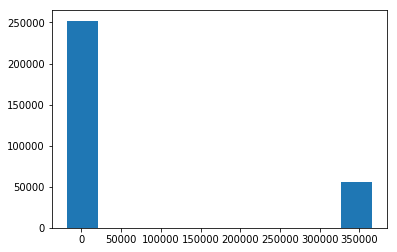

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

In [34]:
# DAYS_EMPLOYED 的概況
display(app_train['DAYS_EMPLOYED'].describe())

# 將 DAYS_EMPLOYED 作直方圖並將累積人數印出
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()
display(app_train['DAYS_EMPLOYED'].value_counts())

#### 從上面的圖與數值可以看出, 數值365243顯然不合理, 而且高達55374筆資料 

In [35]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]  # 不正常的資料
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom), '\n')

non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]  # 正常的資料
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('There are %d non-anomalous days of employment' % len(non_anom))

The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment 

The non-anomalies default on 8.66% of loans
There are 252137 non-anomalous days of employment


#### 補值

False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


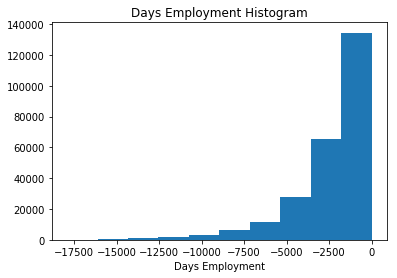

-200.0      156
-224.0      152
-230.0      151
-199.0      151
-212.0      150
-384.0      143
-229.0      143
-231.0      140
-215.0      138
-207.0      138
-216.0      137
-188.0      137
-116.0      136
-196.0      136
-222.0      135
-193.0      134
-195.0      133
-214.0      132
-254.0      131
-213.0      131
-381.0      130
-201.0      130
-185.0      128
-233.0      128
-237.0      127
-194.0      127
-234.0      126
-184.0      126
-348.0      125
-209.0      125
           ... 
-10201.0      1
-14145.0      1
-14147.0      1
-12994.0      1
-11616.0      1
-14019.0      1
-13898.0      1
-10303.0      1
-10299.0      1
-7474.0       1
-10294.0      1
-14035.0      1
-14037.0      1
-10289.0      1
-8384.0       1
-10285.0      1
-9282.0       1
-11100.0      1
-14081.0      1
-14057.0      1
-14786.0      1
-14067.0      1
-10271.0      1
-16554.0      1
-10267.0      1
-8868.0       1
-13006.0      1
-10261.0      1
-14079.0      1
-9062.0       1
Name: DAYS_EMPLOYED, Len

In [36]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = (app_train["DAYS_EMPLOYED"] == 365243)
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())

# 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plt.hist(app_train['DAYS_EMPLOYED']);
plt.title('Days Employment Histogram');
plt.xlabel('Days Employment');
plt.show()
display(app_train['DAYS_EMPLOYED'].value_counts())

#### OWN_CAR_AGE: 貸款人的車齡
* OWN_CAR_AGE內有許多NaN

0     NaN
1     NaN
2    26.0
3     NaN
4     NaN
5     NaN
6    17.0
7     8.0
8     NaN
9     NaN
Name: OWN_CAR_AGE, dtype: float64

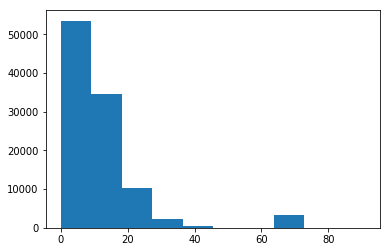

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
        ... 
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
69.0       1
48.0       1
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [37]:
# 檢查 OWN_CAR_AGE
display(app_train['OWN_CAR_AGE'].head(10)) 

plt.hist(app_train['OWN_CAR_AGE'])
plt.show()
app_train['OWN_CAR_AGE'].value_counts()

In [38]:
app_train[app_train['OWN_CAR_AGE'] > 50]['OWN_CAR_AGE'].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

#### 從上面我們可以發現車齡為 64, 65 的人特別多，是否合理?
* 記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [39]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] >= 50 ]['TARGET'].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] < 50]['TARGET'].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%
